In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
from sklearn.preprocessing import scale, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, mean_squared_error
from sklearn import tree 
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from warnings import filterwarnings
filterwarnings('ignore')

ModuleNotFoundError: No module named 'xgboost'

In [2]:
data= pd.read_csv("hmelq.csv")

In [3]:
df=data.copy()

In [4]:
df=df.dropna()
df.head()

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
153,0,18200,94727.0,136877.0,DebtCon,Mgr,15.0,0.0,0.0,168.96,2.0,26.0,36.056
154,0,21700,79240.0,96784.0,DebtCon,Mgr,5.0,0.0,0.0,64.51,6.0,24.0,38.079
155,0,34100,241931.0,36486.0,DebtCon,Mgr,1.0,0.0,2.0,196.01,3.0,50.0,42.459
156,0,8400,62989.0,76718.0,HomeImp,Mgr,3.0,0.0,2.0,131.47,0.0,22.0,29.200
157,0,17400,25859.0,43684.0,DebtCon,Mgr,16.0,1.0,0.0,95.36,1.0,17.0,27.108


In [5]:
dm=pd.get_dummies(df[['reason','job']])
dm.head()

,reason_DebtCon,reason_HomeImp,job_Mgr,job_Office,job_Other,job_ProfEx,job_Sales,job_Self
153,1,0,1,0,0,0,0,0
154,1,0,1,0,0,0,0,0
155,1,0,1,0,0,0,0,0
156,0,1,1,0,0,0,0,0
157,1,0,1,0,0,0,0,0


In [6]:
y=df['bad']
x_=df.drop(['reason','job','bad'],axis=1).astype('float64')
X=pd.concat([x_,dm],axis=1)

X.head()

,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc,reason_DebtCon,reason_HomeImp,job_Mgr,job_Office,job_Other,job_ProfEx,job_Sales,job_Self
153,18200.0,94727.0,136877.0,15.0,0.0,0.0,168.96,2.0,26.0,36.056,1,0,1,0,0,0,0,0
154,21700.0,79240.0,96784.0,5.0,0.0,0.0,64.51,6.0,24.0,38.079,1,0,1,0,0,0,0,0
155,34100.0,241931.0,36486.0,1.0,0.0,2.0,196.01,3.0,50.0,42.459,1,0,1,0,0,0,0,0
156,8400.0,62989.0,76718.0,3.0,0.0,2.0,131.47,0.0,22.0,29.200,0,1,1,0,0,0,0,0
157,17400.0,25859.0,43684.0,16.0,1.0,0.0,95.36,1.0,17.0,27.108,1,0,1,0,0,0,0,0


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)

print("X_train", X_train.shape)

print("y_train",y_train.shape)

print("X_test",X_test.shape)

print("y_test",y_test.shape)

training = df.copy()

print("training", training.shape)

X_train (1513, 18)
y_train (1513,)
X_test (505, 18)
y_test (505,)
training (2018, 13)


# CART ALGORİTMASI

MODEL

In [8]:
cart_model=DecisionTreeClassifier()

In [9]:
cart_model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

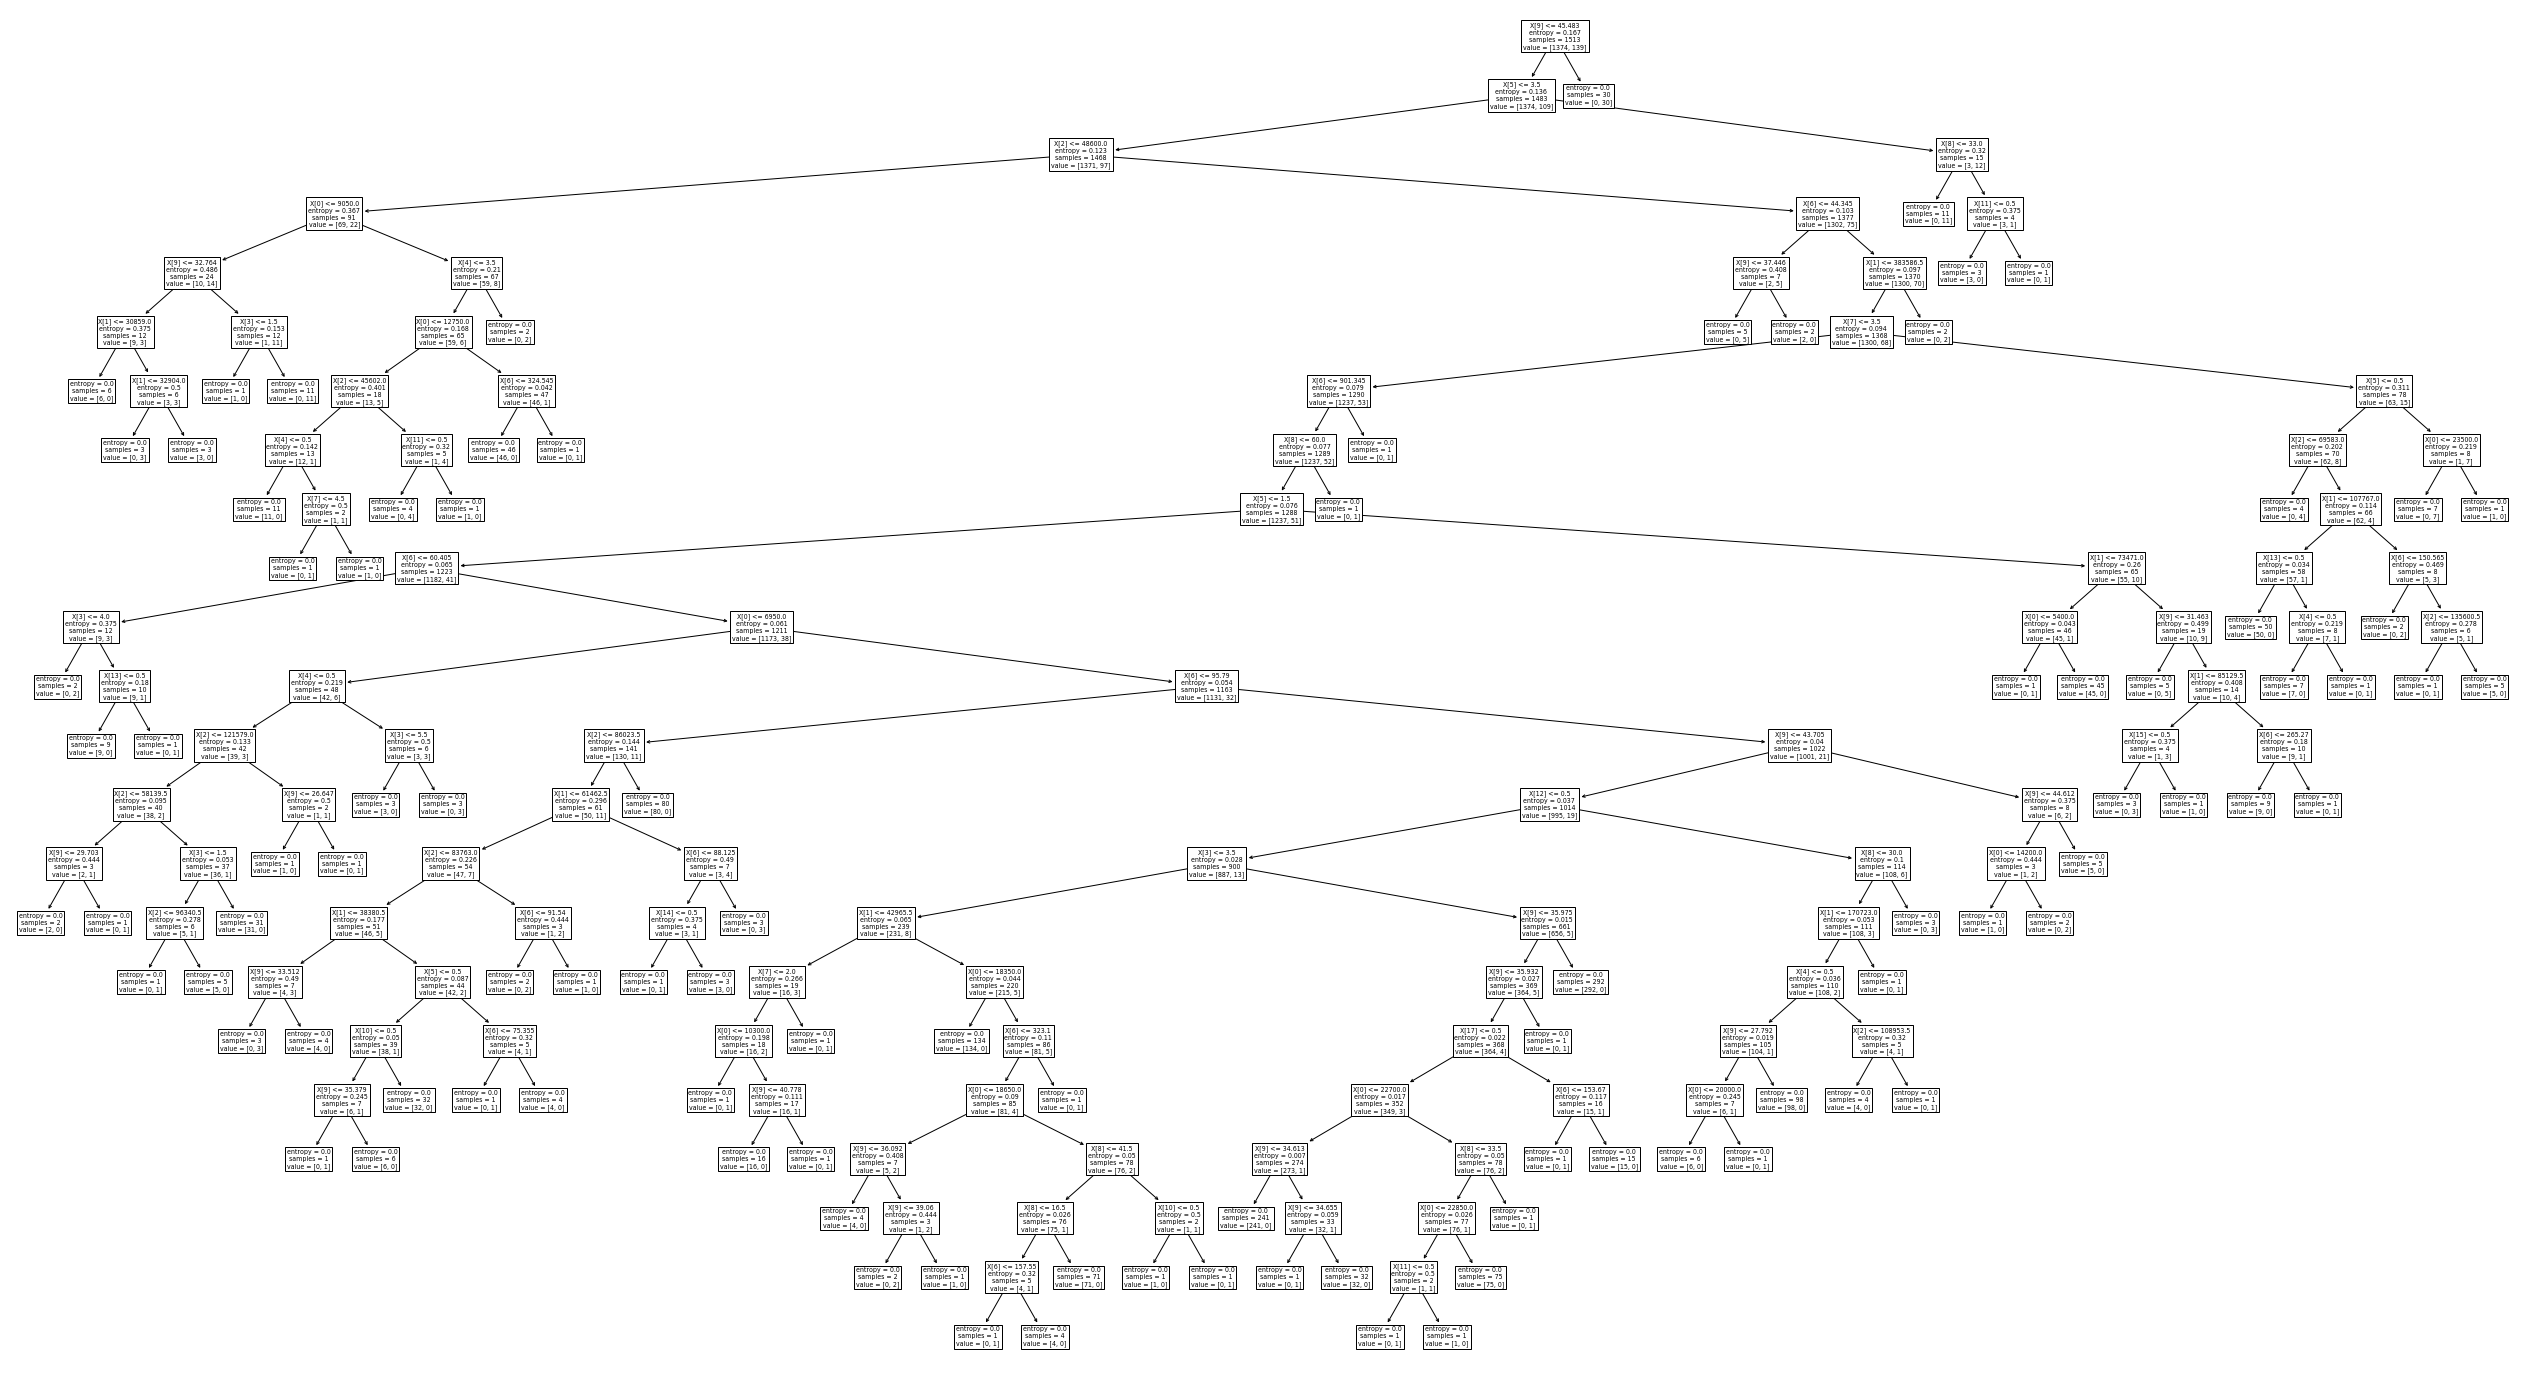

In [74]:
from sklearn import tree
plt.figure(figsize=(45,25))
tree.plot_tree(cart_model);


In [11]:
y_pred= cart_model.predict(X_train)
#model hatası
np.sqrt(mean_squared_error(y_train,y_pred))

0.0

In [21]:
from skompiler import skompile
print(skompile(cart_model.predict).to('python/code'))

((((((0.0 if x[1] <= 30859.0 else 1.0 if x[3] <= 6.5 else 0.0) if x[9] <= 
    32.76449966430664 else 0.0 if x[3] <= 1.5 else 1.0) if x[0] <= 9050.0 else
    (((0.0 if x[4] <= 0.5 else 0.0 if x[8] <= 8.0 else 1.0) if x[2] <= 
    45602.0 else 0.0 if x[6] <= 81.6150016784668 else 1.0) if x[0] <= 
    12750.0 else 0.0 if x[6] <= 324.5449981689453 else 1.0) if x[4] <= 3.5 else
    1.0) if x[2] <= 48600.0 else (1.0 if x[9] <= 37.44599914550781 else 0.0
    ) if x[6] <= 44.345001220703125 else ((((((1.0 if x[3] <= 4.0 else 0.0 if
    x[13] <= 0.5 else 1.0) if x[6] <= 60.404998779296875 else ((((1.0 if x[
    1] <= 68316.0 else 0.0) if x[3] <= 1.5 else 0.0) if x[10] <= 0.5 else (
    0.0 if x[3] <= 1.0 else 1.0) if x[8] <= 28.0 else 0.0) if x[4] <= 0.5 else
    1.0 if x[6] <= 160.40499877929688 else 0.0) if x[0] <= 6950.0 else ((((
    (1.0 if x[9] <= 33.51150035858154 else 0.0) if x[1] <= 38380.5 else (
    0.0 if x[11] <= 0.5 else 1.0 if x[9] <= 35.37899971008301 else 0.0) if 
    x[5] <= 

TAHMİN

In [24]:
x=2

In [27]:
((((((0.0 if x[1] <= 30859.0 else 1.0 if x[3] <= 6.5 else 0.0) if x[9] <= 
    32.76449966430664 else 0.0 if x[3] <= 1.5 else 1.0) if x[0] <= 9050.0 else
    (((0.0 if x[4] <= 0.5 else 0.0 if x[8] <= 8.0 else 1.0) if x[2] <= 
    45602.0 else 0.0 if x[6] <= 81.6150016784668 else 1.0) if x[0] <= 
    12750.0 else 0.0 if x[6] <= 324.5449981689453 else 1.0) if x[4] <= 3.5 else
    1.0) if x[2] <= 48600.0 else (1.0 if x[9] <= 37.44599914550781 else 0.0
    ) if x[6] <= 44.345001220703125 else ((((((1.0 if x[3] <= 4.0 else 0.0 if
    x[13] <= 0.5 else 1.0) if x[6] <= 60.404998779296875 else ((((1.0 if x[
    1] <= 68316.0 else 0.0) if x[3] <= 1.5 else 0.0) if x[10] <= 0.5 else (
    0.0 if x[3] <= 1.0 else 1.0) if x[8] <= 28.0 else 0.0) if x[4] <= 0.5 else
    1.0 if x[6] <= 160.40499877929688 else 0.0) if x[0] <= 6950.0 else ((((
    (1.0 if x[9] <= 33.51150035858154 else 0.0) if x[1] <= 38380.5 else (
    0.0 if x[11] <= 0.5 else 1.0 if x[9] <= 35.37899971008301 else 0.0) if 
    x[5] <= 0.5 else 1.0 if x[6] <= 75.35499954223633 else 0.0) if x[2] <= 
    83763.0 else 0.0 if x[9] <= 24.32099986076355 else 1.0) if x[1] <= 
    61462.5 else 1.0 if x[0] <= 10200.0 else 1.0 if x[7] <= 0.5 else 0.0) if
    x[2] <= 86023.5 else 0.0) if x[6] <= 95.79000091552734 else (((((1.0 if
    x[0] <= 10300.0 else 0.0 if x[1] <= 41692.0 else 1.0) if x[9] <= 
    40.778499603271484 else 1.0) if x[1] <= 42965.5 else 0.0 if x[0] <= 
    18350.0 else ((0.0 if x[9] <= 36.092498779296875 else 1.0 if x[6] <= 
    241.3499984741211 else 0.0) if x[0] <= 18650.0 else ((1.0 if x[6] <= 
    157.54999542236328 else 0.0) if x[8] <= 16.5 else 0.0) if x[8] <= 41.5 else
    1.0 if x[2] <= 199560.0 else 0.0) if x[6] <= 323.1000061035156 else 1.0
    ) if x[3] <= 3.5 else ((((0.0 if x[9] <= 34.61300086975098 else 1.0 if 
    x[9] <= 34.65450096130371 else 0.0) if x[0] <= 22700.0 else ((0.0 if x[
    10] <= 0.5 else 1.0) if x[0] <= 22850.0 else 0.0) if x[8] <= 33.5 else 
    1.0) if x[17] <= 0.5 else 0.0 if x[3] <= 12.5 else 1.0) if x[9] <= 
    35.932498931884766 else 1.0) if x[9] <= 35.974998474121094 else 0.0) if
    x[12] <= 0.5 else ((((0.0 if x[9] <= 27.679999351501465 else 1.0) if x[
    9] <= 27.792499542236328 else 0.0) if x[4] <= 0.5 else 1.0 if x[6] <= 
    145.6099967956543 else 0.0) if x[0] <= 44650.0 else 1.0) if x[8] <= 
    30.0 else 1.0) if x[9] <= 43.70450019836426 else (0.0 if x[0] <= 
    14200.0 else 1.0) if x[9] <= 44.61199951171875 else 0.0) if x[5] <= 1.5
     else (1.0 if x[0] <= 5400.0 else 0.0) if x[1] <= 73471.0 else 1.0 if x
    [9] <= 31.463000297546387 else (1.0 if x[15] <= 0.5 else 0.0) if x[1] <=
    85129.5 else 0.0 if x[3] <= 21.5 else 1.0) if x[8] <= 60.0 else 1.0) if
    x[6] <= 901.3450012207031 else 1.0) if x[7] <= 3.5 else (1.0 if x[2] <=
    69583.0 else (0.0 if x[13] <= 0.5 else 0.0 if x[4] <= 0.5 else 1.0) if 
    x[1] <= 107767.0 else 1.0 if x[9] <= 36.91349983215332 else 0.0 if x[9] <=
    44.377498626708984 else 1.0) if x[5] <= 0.5 else 1.0 if x[0] <= 23500.0
     else 0.0) if x[2] <= 490456.0 else 1.0) if x[5] <= 3.5 else 1.0 if x[8
    ] <= 33.0 else 0.0 if x[1] <= 62489.5 else 1.0) if x[9] <= 
    45.48349952697754 else 1.0)


SyntaxError: invalid syntax (<ipython-input-27-f73997791716>, line 1)

MODEL TUNING

In [12]:
cart_params = {"min_samples_split": range(10,50),
               "min_samples_leaf": [10,15,20],
               "max_leaf_nodes": range(4,8)}

In [13]:
cart_cv_model=GridSearchCV(cart_model,cart_params,cv=10)

In [14]:
cart_cv_model.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_leaf_nodes': range(4, 8),
                         'min_samples_leaf': [10, 15, 20],
                    

In [15]:
cart_cv_model.best_params_

{'max_leaf_nodes': 4, 'min_samples_leaf': 10, 'min_samples_split': 10}

In [16]:
cart_tuned=DecisionTreeRegressor(max_leaf_nodes=4,min_samples_leaf=10,min_samples_split=10)

In [17]:
cart_tuned.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=4, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=10,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [18]:
y_pred= cart_model.predict(X_train)
np.sqrt(mean_squared_error(y_train,y_pred))

0.0

In [19]:
cart_tuned.fit(X_test,y_test)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=4, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=10,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [22]:
y_pred= cart_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

0.24776226228758363

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       466
           1       0.65      0.44      0.52        39

    accuracy                           0.94       505
   macro avg       0.80      0.71      0.75       505
weighted avg       0.93      0.94      0.93       505



# RANDOM FOREST

MODEL

In [24]:
from sklearn.ensemble import RandomForestRegressor
rf_model=RandomForestClassifier()

In [25]:
rf_model.fit(X_train,y_train)

C:\Users\karde\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

TAHMİN

In [41]:
print(skompile(rf_model.predict).to('python/code'))

((((((0.1 if x[1] <= 54817.5 else 0.0) if x[0] <= 4450.0 else (((0.1 if x[8
    ] <= 10.0 else 0.0) if x[2] <= 37439.0 else 0.1) if x[0] <= 11000.0 else
    0.0) if x[2] <= 39783.5 else 0.1 if x[8] <= 2.0 else (((0.0 if x[8] <= 
    18.0 else 0.1) if x[9] <= 7.250499963760376 else (((0.0 if x[9] <= 
    36.38549995422363 else 0.1) if x[8] <= 4.5 else (0.1 if x[6] <= 
    53.65999984741211 else (0.0 if x[0] <= 6850.0 else 0.1) if x[0] <= 
    6950.0 else (((0.1 if x[0] <= 10300.0 else 0.0 if x[9] <= 
    40.778499603271484 else 0.1) if x[7] <= 1.5 else 0.1) if x[1] <= 
    42636.0 else 0.1 if x[6] <= 70.38000106811523 else 0.0) if x[3] <= 3.5 else
    ((0.1 if x[9] <= 35.35599994659424 else 0.0) if x[1] <= 38380.5 else 
    0.0 if x[0] <= 9450.0 else 0.0 if x[9] <= 30.256999969482422 else 0.1) if
    x[0] <= 9550.0 else 0.0) if x[17] <= 0.5 else 0.1) if x[2] <= 75277.5 else
    0.1) if x[2] <= 75362.0 else (((0.0 if x[2] <= 119774.0 else 0.1) if x[
    0] <= 5600.0 else (0.0 if x[8] <= 

In [26]:
y_pred=rf_model.predict(X_train)
np.sqrt(mean_squared_error(y_train,y_pred))

0.08526619412100572

In [27]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1374
           1       1.00      0.92      0.96       139

    accuracy                           0.99      1513
   macro avg       1.00      0.96      0.98      1513
weighted avg       0.99      0.99      0.99      1513



MODEL TUNING 

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2018 entries, 153 to 3549
Data columns (total 13 columns):
bad        2018 non-null int64
loan       2018 non-null int64
mortdue    2018 non-null float64
value      2018 non-null float64
reason     2018 non-null object
job        2018 non-null object
yoj        2018 non-null float64
derog      2018 non-null float64
delinq     2018 non-null float64
clage      2018 non-null float64
ninq       2018 non-null float64
clno       2018 non-null float64
debtinc    2018 non-null float64
dtypes: float64(9), int64(2), object(2)
memory usage: 220.7+ KB


In [28]:
rf_params = {"max_depth": [2,5,8,10],
             "max_features": [3,7,13],
             "min_samples_split": [5,10],
             "n_estimators" : [100, 200, 500]}

In [29]:
rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv=10, 
                           n_jobs=-1, 
                           verbose=2)
rf_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   21.8s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   56.0s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:  2.6min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='w

In [30]:
rf_cv_model.best_params_

{'max_depth': 10,
 'max_features': 7,
 'min_samples_split': 5,
 'n_estimators': 500}

In [66]:
rf_tuned = RandomForestClassifier(max_depth  = 10, 
                                 max_features = 7, 
                                 n_estimators =500,
                                 min_samples_split=5)

In [67]:
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features=7, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [68]:
y_pred= rf_tuned.predict(X_train)
np.sqrt(mean_squared_error(y_train, y_pred))

0.19409661605715353

In [69]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1374
           1       1.00      0.59      0.74       139

    accuracy                           0.96      1513
   macro avg       0.98      0.79      0.86      1513
weighted avg       0.96      0.96      0.96      1513



In [70]:
rf_tuned.fit(X_test, y_test)
y_pred= rf_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

0.13349824784699543

In [71]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       466
           1       1.00      0.77      0.87        39

    accuracy                           0.98       505
   macro avg       0.99      0.88      0.93       505
weighted avg       0.98      0.98      0.98       505



In [72]:
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},
                         index = X_train.columns)


Text(0.5, 0, 'Değişken Önem Düzeyleri')

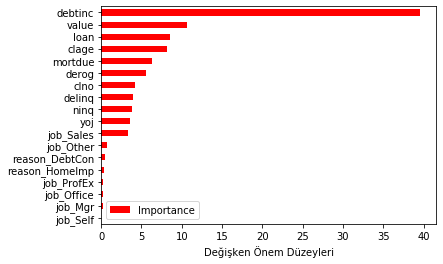

In [73]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")

# YAPAY SİNİR AĞLARI

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)

print("X_train", X_train.shape)

print("y_train",y_train.shape)

print("X_test",X_test.shape)

print("y_test",y_test.shape)

training = df.copy()

print("training", training.shape)

X_train (1513, 18)
y_train (1513,)
X_test (505, 18)
y_test (505,)
training (2018, 13)


In [40]:
from sklearn.neural_network import MLPClassifier
mlp_model = MLPClassifier(hidden_layer_sizes = (100,20)).fit(X_train, y_train)

C:\Users\karde\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


TAHMİN

In [59]:
y_pred= mlp_model.predict(X_train)
np.sqrt(mean_squared_error(y_train, y_pred))

0.29870838943143485

In [60]:
accuracy_score(y_train, y_pred)

0.9107732980832782

In [61]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1374
           1       1.00      0.03      0.06       139

    accuracy                           0.91      1513
   macro avg       0.96      0.51      0.50      1513
weighted avg       0.92      0.91      0.87      1513



MODEL TUNING

In [42]:
mlp_params = {'alpha': [0.1, 0.01,0.02,0.005],
             'hidden_layer_sizes': [(20,20),(100,50,150),(300,200,150)],
             'activation': ['relu','logistic']}

In [43]:
mlp_cv_model = GridSearchCV(mlp_model, mlp_params, cv = 10)

In [44]:
mlp_cv_model.fit(X_train, y_train)

C:\Users\karde\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\karde\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\karde\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\karde\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Converge

C:\Users\karde\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\karde\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\karde\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\karde\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Converge

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08,
                                     hidden_layer_sizes=(100, 20),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_iter=200,
                                     momentum=0.9, n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=None, shuffle=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={

In [45]:
mlp_cv_model.best_params_

{'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': (300, 200, 150)}

In [47]:
mlp_tuned = MLPClassifier(alpha = 0.1, hidden_layer_sizes = (20,20))

In [48]:
mlp_tuned.fit(X_train, y_train)

C:\Users\karde\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.1, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(20, 20), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [56]:
y_pred= mlp_tuned.predict(X_train)
np.sqrt(mean_squared_error(y_train, y_pred))

0.3159140997805971

In [58]:
accuracy_score(y_train, y_pred)

0.900198281559815

In [50]:
mlp_tuned.fit(X_test, y_test)

C:\Users\karde\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.1, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(20, 20), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [51]:
y_pred= mlp_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

0.2918021844529015

In [53]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96       466
           1       0.00      0.00      0.00        39

    accuracy                           0.91       505
   macro avg       0.46      0.50      0.48       505
weighted avg       0.85      0.91      0.88       505



In [54]:
accuracy_score(y_test, y_pred)

0.9148514851485149